In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
df = pd.read_csv('Salary_Data.csv')
print('top 5 rows:\n', df.head(),'\n')
print('inofrmation:')
print(df.info())

top 5 rows:
    YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0 

inofrmation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


In [272]:
df=df.rename({'YearsExperience':'exp', 'Salary':'salary'}, axis=1)
df.head()

,exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [273]:
df.duplicated().value_counts()

False    30
Name: count, dtype: int64

In [274]:
print('statistics:\n',df.describe(),'\n')
print('corr:\n',df.corr())

statistics:
              exp         salary
count  30.000000      30.000000
mean    5.313333   76003.000000
std     2.837888   27414.429785
min     1.100000   37731.000000
25%     3.200000   56720.750000
50%     4.700000   65237.000000
75%     7.700000  100544.750000
max    10.500000  122391.000000 

corr:
              exp    salary
exp     1.000000  0.978242
salary  0.978242  1.000000


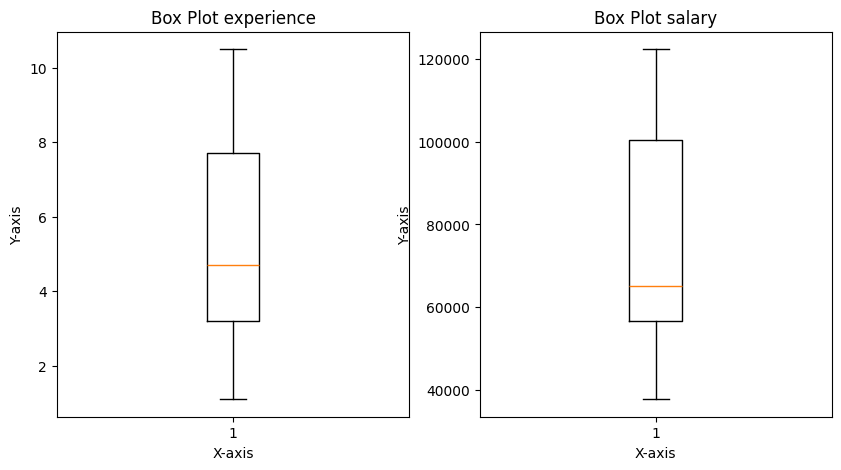

In [275]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
bp_exp = ax[0].boxplot(df['exp'])
bp_sal = ax[1].boxplot(df['salary'])
ax[0].set_title('Box Plot experience')
ax[1].set_title('Box Plot salary')
ax[0].set_xlabel('X-axis')
ax[0].set_ylabel('Y-axis')
ax[1].set_xlabel('X-axis')
ax[1].set_ylabel('Y-axis')
plt.show()

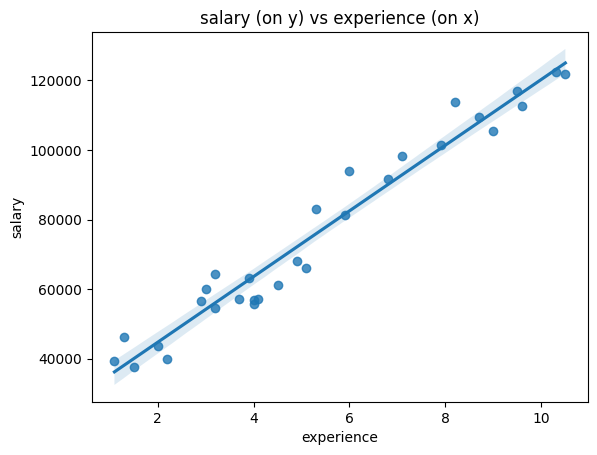

In [276]:
sns.regplot(data=df, x=df['exp'], y=df['salary'])
plt.xlabel('experience')
plt.ylabel('salary')
plt.title('salary (on y) vs experience (on x)')
plt.show()

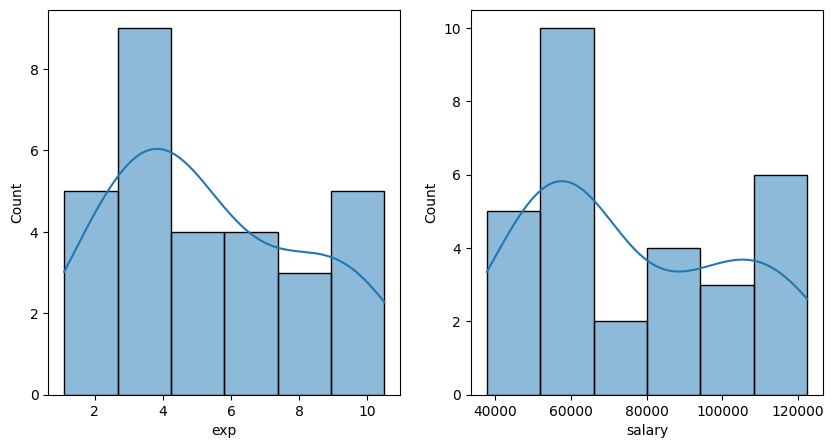

In [277]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['exp'], kde=True, ax=axes[0])
sns.histplot(df['salary'], kde=True, ax=axes[1])
plt.show()

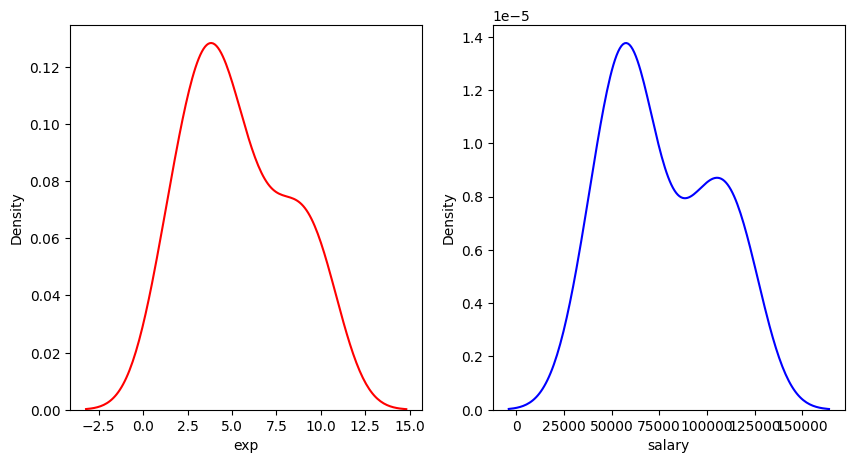

In [278]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(df['exp'],color='r',ax=axes[0])
sns.kdeplot(df['salary'],color='b',ax=axes[1])
plt.show()

# fit Linear Regression Model using sklearn

In [279]:
# no split
x=df[['exp']]
y=df[['salary']]

In [280]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x,y)

In [281]:
r_sq = model.score(x,y)
print(f'coefficient of determination r_sq: {r_sq}')
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

coefficient of determination r_sq: 0.9569566641435086
intercept: [25792.20019867]
slope: [[9449.96232146]]
predicted response:
[[ 36187.15875227]
 [ 38077.15121656]
 [ 39967.14368085]
 [ 44692.12484158]
 [ 46582.11730587]
 [ 53197.09093089]
 [ 54142.08716303]
 [ 56032.07962732]
 [ 56032.07962732]
 [ 60757.06078805]
 [ 62647.05325234]
 [ 63592.04948449]
 [ 63592.04948449]
 [ 64537.04571663]
 [ 68317.03064522]
 [ 72097.0155738 ]
 [ 73987.00803809]
 [ 75877.00050238]
 [ 81546.97789525]
 [ 82491.9741274 ]
 [ 90051.94398456]
 [ 92886.932681  ]
 [100446.90253816]
 [103281.8912346 ]
 [108006.87239533]
 [110841.86109176]
 [115566.84225249]
 [116511.83848464]
 [123126.81210966]
 [125016.80457395]]


In [282]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Mean squared error: 31270951.72
Coefficient of determination: 0.96


# split the data

In [283]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=42) 

In [284]:
from sklearn.linear_model import LinearRegression  
model_split = LinearRegression()  
model_split.fit(x_train, y_train)
y_pred = model_split.predict(x_test)

In [285]:
# The coefficients
print("Coefficients:", model_split.coef_)
# The interceept
print('Intercepts:', model_split.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: [[9423.81532303]]
Intercepts: [25321.58301178]
Mean squared error: 49830096.86
Coefficient of determination: 0.90


# *********************

## scale the data and fit the model

In [286]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = df[['exp']], df[['salary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
y_pred = pipe.predict(X_test)

In [287]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
#print('\n')
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 38802588.99
Coefficient of determination: 0.93


# ******************
## transform the data and fit the model

In [288]:
from sklearn.preprocessing import PowerTransformer

X, y = df[['exp']], df[['salary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(PowerTransformer(), LinearRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
y_pred = pipe.predict(X_test)

In [289]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 65048168.85
Coefficient of determination: 0.89


# Linear Regression Model using Statsmodels

In [290]:
import statsmodels.formula.api as smf
smfmodel = smf.ols('salary~exp', data=df).fit()
smfmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        16:43:44   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
# test with new data

x_new = pd.DataFrame(np.array([4.0,6.0,8.0]), columns=['exp'])
x_new

y_new = smfmodel.predict(x_new)
y_new

0     63592.049484
1     82491.974127
2    101391.898770
dtype: float64

## apply transformations

model_plain:
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        16:43:44   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11

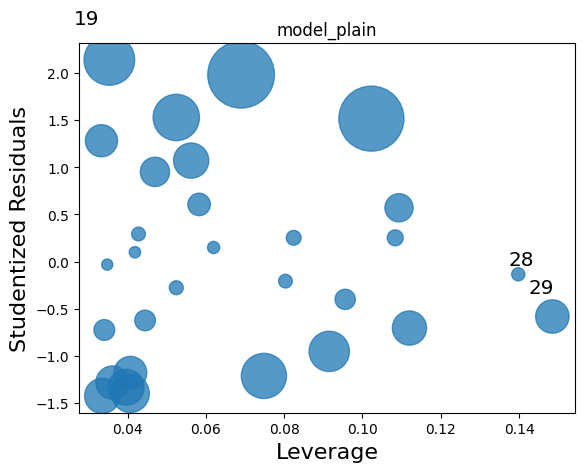

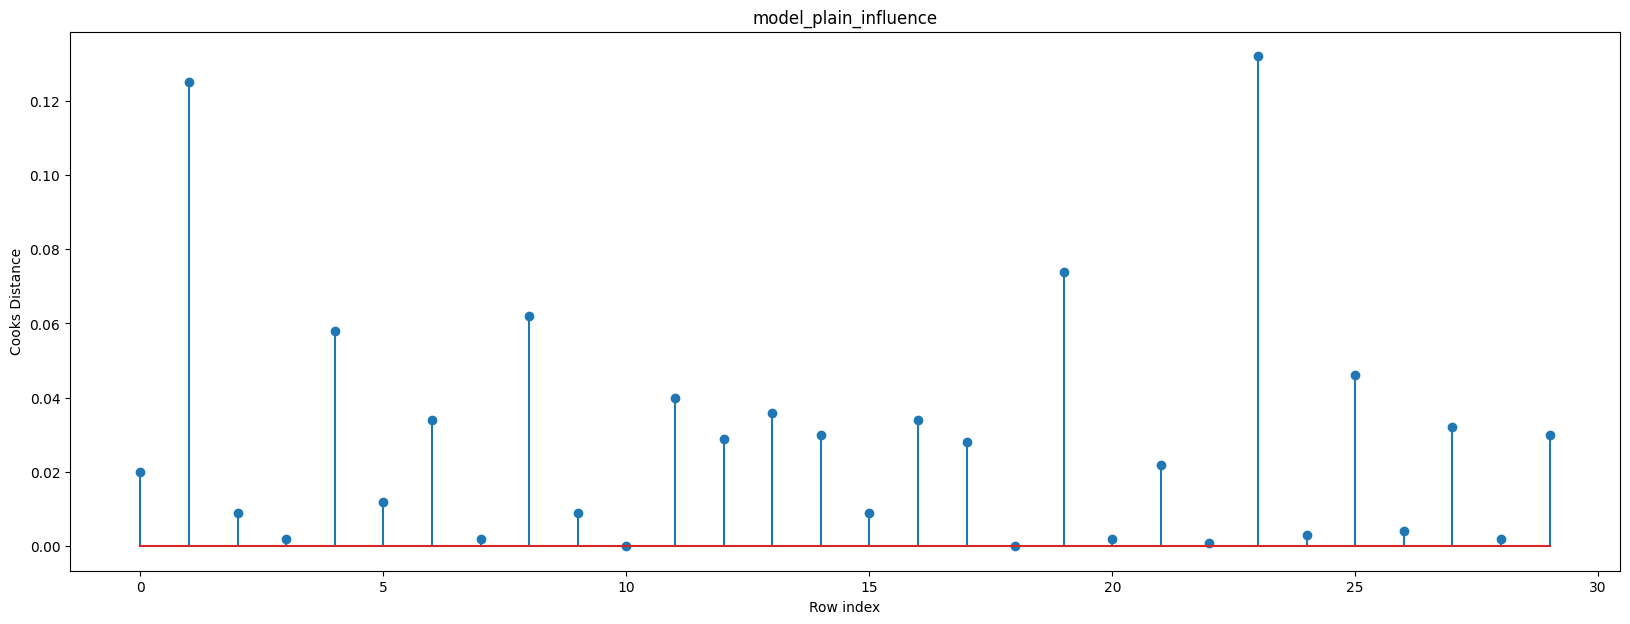

23 0.13175452313135222


In [292]:
print('model_plain:')
model_plain = smf.ols('salary~exp',data=df).fit()
print(model_plain.summary())
print('\n')

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_plain)
plt.title('model_plain')
plt.show()

# Cooks distance to detect outlier
model_plain_influence = model_plain.get_influence()
(c, _) = model_plain_influence.cooks_distance

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.title('model_plain_influence')
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

print(np.argmax(c),np.max(c))

In [293]:
df_plain=pd.read_csv('Salary_Data.csv')
df_plain=df_plain.drop(df_plain.index[[23]],axis=0).reset_index()
print(df_plain.tail(10))

df_plain = df_plain.rename(columns={"Salary":"salary","YearsExperience":"exp"})
model_plain=smf.ols('salary~exp',data=df_plain).fit()
model_plain.summary()


    index  YearsExperience    Salary
19     19              6.0   93940.0
20     20              6.8   91738.0
21     21              7.1   98273.0
22     22              7.9  101302.0
23     24              8.7  109431.0
24     25              9.0  105582.0
25     26              9.5  116969.0
26     27              9.6  112635.0
27     28             10.3  122391.0
28     29             10.5  121872.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     642.7
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           2.31e-20
Time:                        16:43:45   Log-Likelihood:                -289.92
No. Observations:                  29   AIC:                             583.8
Df Residuals:                      27   BIC:                             586.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.616e+04   2170.703     12.050      0.000    2.17e+04    3.06e+04
exp         9310.1657    367.231     25.352      0.000    8556.671    1.01e+04
==============================================================================
Omnibus:                        1.341   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                1.170
Skew:                           0.320   Prob(JB):                        0.557
Kurtosis:                       2.252   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

model_log_ip:
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           3.25e-13
Time:                        16:43:45   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.493e+04   5156.226   

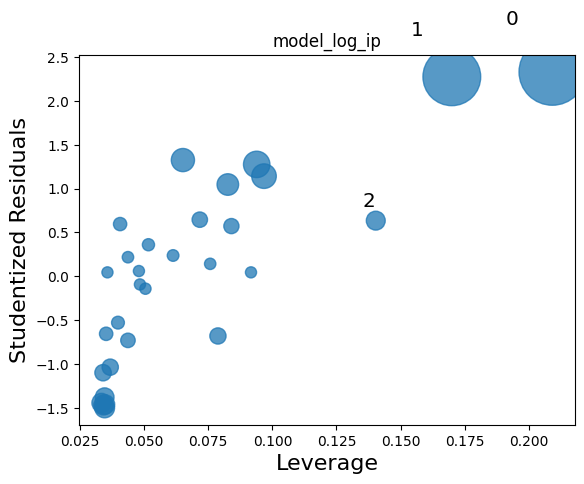

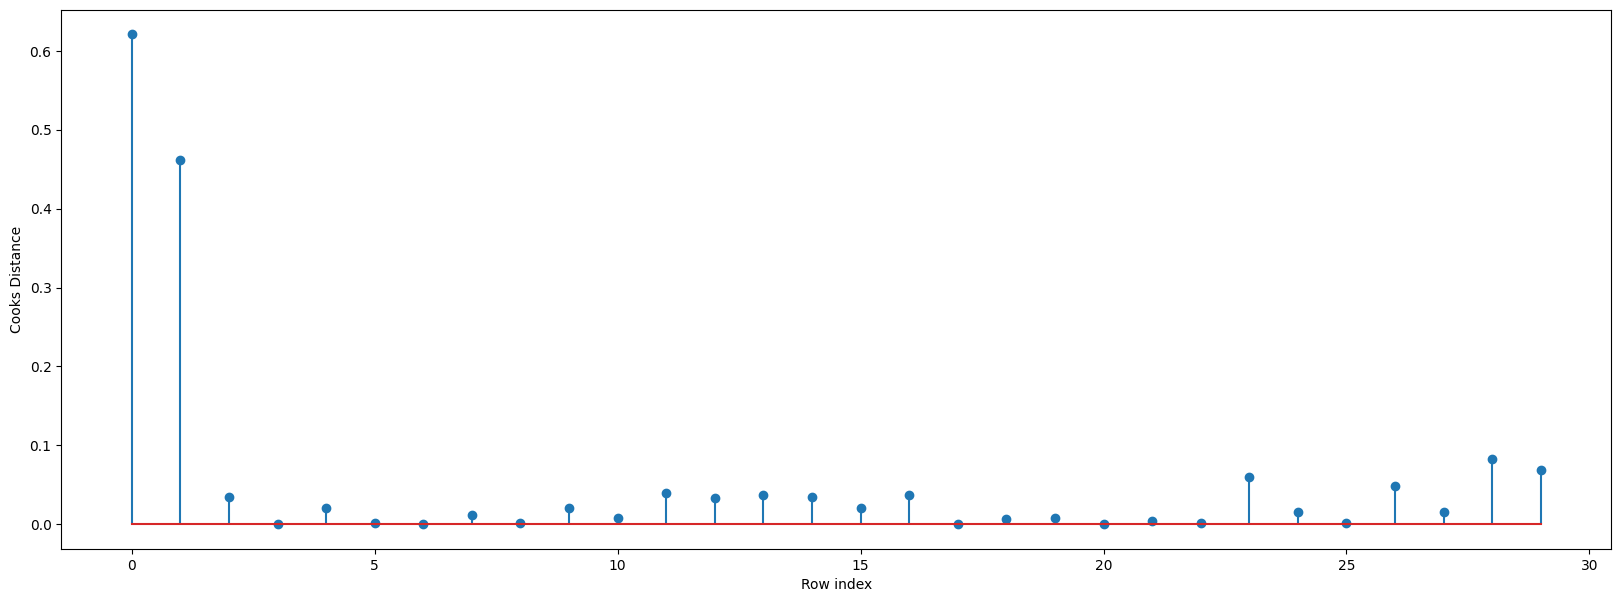

0 0.6208228191573504


In [294]:
print('model_log_ip:')
model_log_ip = smf.ols('salary~np.log(exp)',data=df).fit()
print(model_log_ip.summary())
print('\n')

influence_plot(model_log_ip)
plt.title('model_log_ip')
plt.show()

# Cooks distance to detect outlier
from statsmodels.graphics.regressionplots import influence_plot
model_log_ip_influence = model_log_ip.get_influence()
(c, _) = model_log_ip_influence.cooks_distance

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

print(np.argmax(c),np.max(c))


In [295]:
df_log_ip=pd.read_csv('Salary_Data.csv')
df_log_ip=df_log_ip.drop(df_log_ip.index[[0]],axis=0).reset_index()
print(df_log_ip.head())

df_log_ip = df_log_ip.rename(columns={"Salary":"salary","YearsExperience":"exp"})
model_log_ip=smf.ols('salary~np.log(exp)',data=df_log_ip).fit()
model_log_ip.summary()

   index  YearsExperience   Salary
0      1              1.3  46205.0
1      2              1.5  37731.0
2      3              2.0  43525.0
3      4              2.2  39891.0
4      5              2.9  56642.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     180.8
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.75e-13
Time:                        16:43:45   Log-Likelihood:                -306.95
No. Observations:                  29   AIC:                             617.9
Df Residuals:                      27   BIC:                             620.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9184.0070   5386.677      1.705      0.100   -1868.541    2.02e+04
np.log(exp)  4.382e+04   3258.723     13.448      0.000    3.71e+04    5.05e+04
==============================================================================
Omnibus:                        0.711   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.399
Skew:                           0.285   Prob(JB):                        0.819
Kurtosis:                       2.929   Cond. No.                         6.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

model_log_op:
                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           7.03e-18
Time:                        16:43:45   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    27

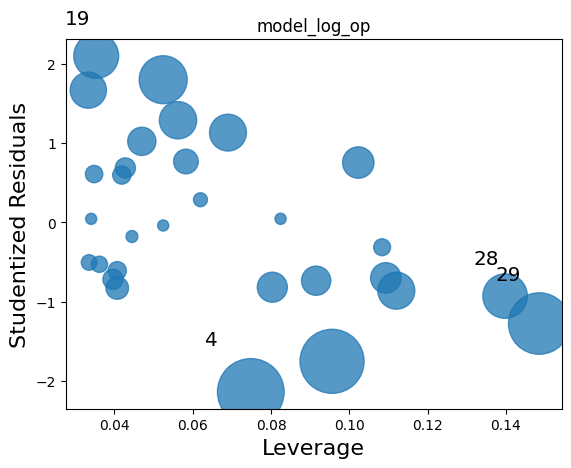

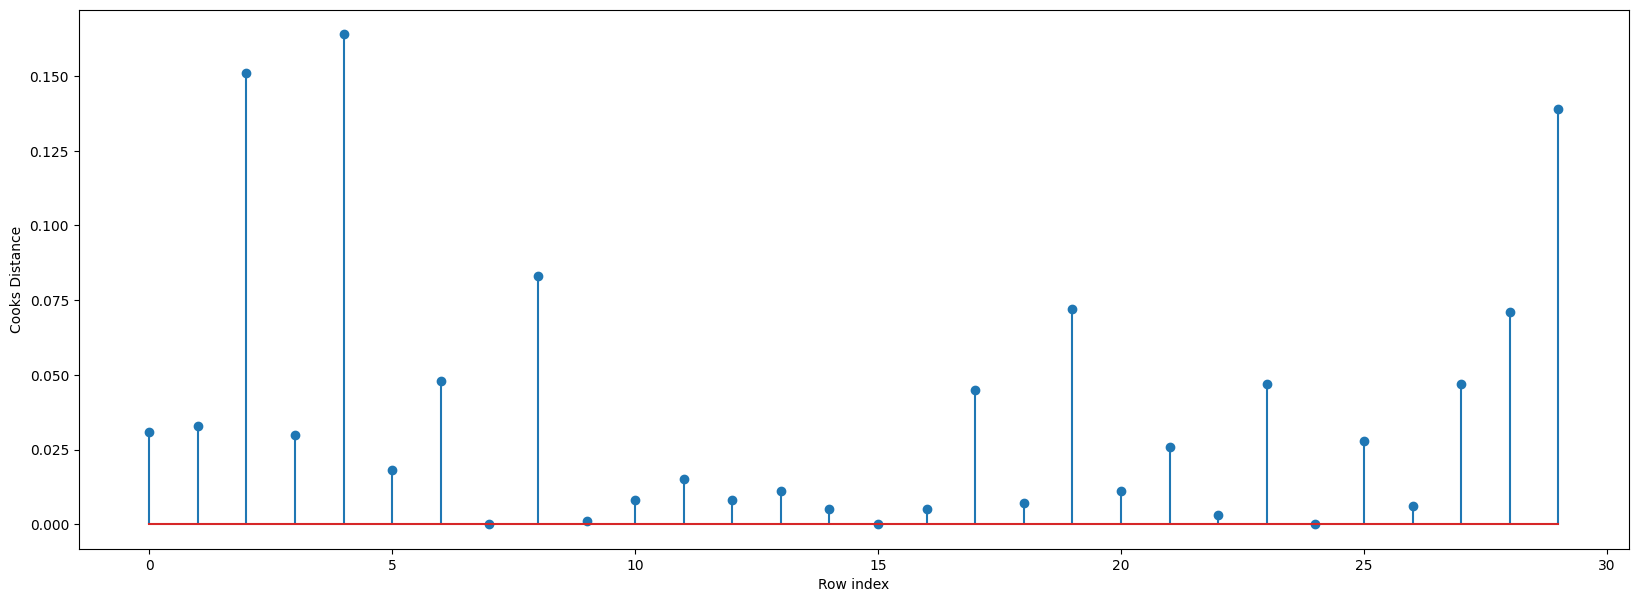

4 0.16379750382349378
   index  YearsExperience   Salary
0      0              1.1  39343.0
1      1              1.3  46205.0
2      2              1.5  37731.0
3      3              2.0  43525.0
4      5              2.9  56642.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     396.0
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.16e-17
Time:                        16:43:46   Log-Likelihood:                 29.017
No. Observations:                  29   AIC:                            -54.03
Df Residuals:                      27   BIC:                            -51.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5287      0.038    280.335      0.000      10.452      10.606
exp            0.1227      0.006     19.901      0.000       0.110       0.135
==============================================================================
Omnibus:                        1.446   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                1.199
Skew:                           0.308   Prob(JB):                        0.549
Kurtosis:                       2.216   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [296]:
print('model_log_op:')
model_log_op = smf.ols('np.log(salary)~exp',data=df).fit()
print(model_log_op.summary())
print('\n')

influence_plot(model_log_op)
plt.title('model_log_op')
plt.show()

# Cooks distance to detect outlier
from statsmodels.graphics.regressionplots import influence_plot
model_log_op_influence = model_log_op.get_influence()
(c, _) = model_log_op_influence.cooks_distance

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

print(np.argmax(c),np.max(c))

df_log_op=pd.read_csv('Salary_Data.csv')
df_log_op=df_log_op.drop(df_log_op.index[[4]],axis=0).reset_index()
print(df_log_op.head())

df_log_op = df_log_op.rename(columns={"Salary":"salary","YearsExperience":"exp"})
model_log_op=smf.ols('np.log(salary)~exp',data=df_log_op).fit()
model_log_op.summary()

model_log_io:
                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           7.40e-16
Time:                        16:43:46   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.3280      0.056   

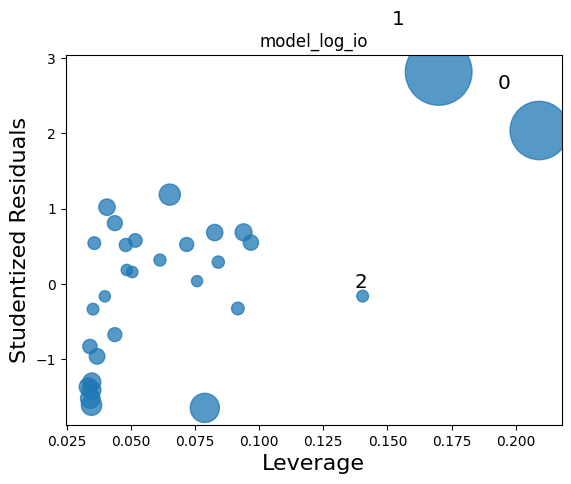

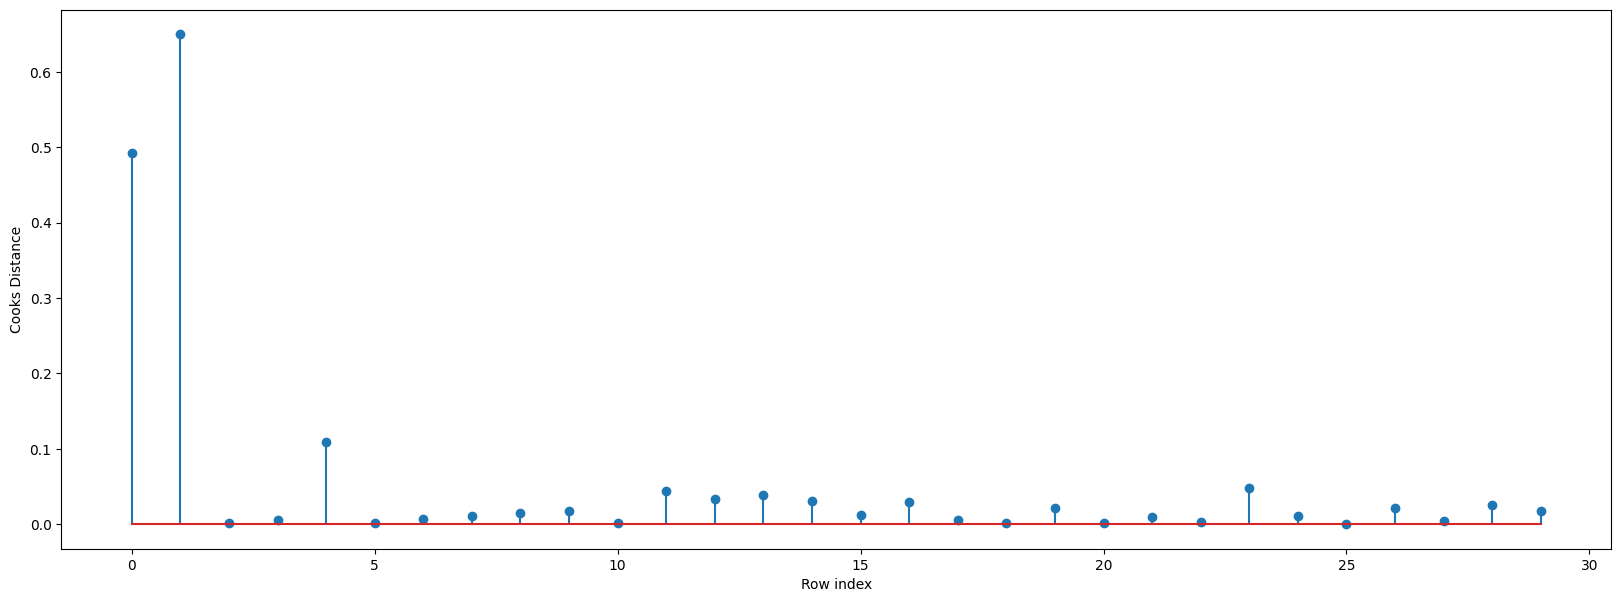

1 0.650439519277512
   index  YearsExperience   Salary
0      0              1.1  39343.0
1      2              1.5  37731.0
2      3              2.0  43525.0
3      4              2.2  39891.0
4      5              2.9  56642.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     323.3
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.48e-16
Time:                        16:43:46   Log-Likelihood:                 25.674
No. Observations:                  29   AIC:                            -47.35
Df Residuals:                      27   BIC:                            -44.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.2645      0.055    187.022      0.000      10.152      10.377
np.log(exp)     0.5972      0.033     17.981      0.000       0.529       0.665
==============================================================================
Omnibus:                        0.160   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.082
Skew:                           0.104   Prob(JB):                        0.960
Kurtosis:                       2.842   Cond. No.                         6.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
print('model_log_io:')
model_log_io = smf.ols('np.log(salary)~np.log(exp)',data=df).fit()
print(model_log_io.summary())
print('\n')

influence_plot(model_log_io)
plt.title('model_log_io')
plt.show()

# Cooks distance to detect outlier
from statsmodels.graphics.regressionplots import influence_plot
model_log_io_influence = model_log_io.get_influence()
(c, _) = model_log_io_influence.cooks_distance

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

print(np.argmax(c),np.max(c))

df_log_io=pd.read_csv('Salary_Data.csv')
df_log_io=df_log_io.drop(df_log_io.index[[1]],axis=0).reset_index()
print(df_log_io.head())

df_log_io = df_log_io.rename(columns={"Salary":"salary","YearsExperience":"exp"})
model_log_io=smf.ols('np.log(salary)~np.log(exp)',data=df_log_io).fit()
model_log_io.summary()

model_exp:
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           2.72e-05
Time:                        16:43:46   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.757e+04   4065.396     1

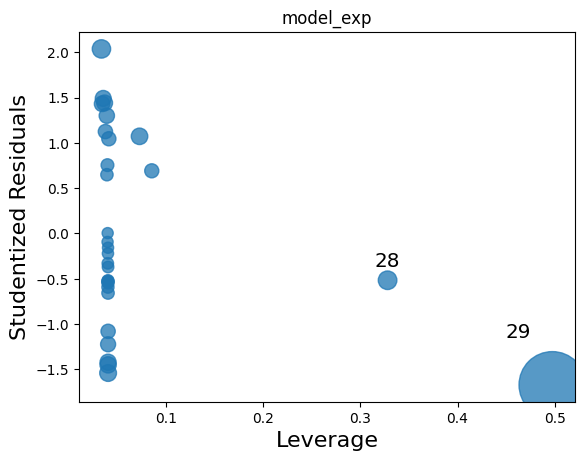

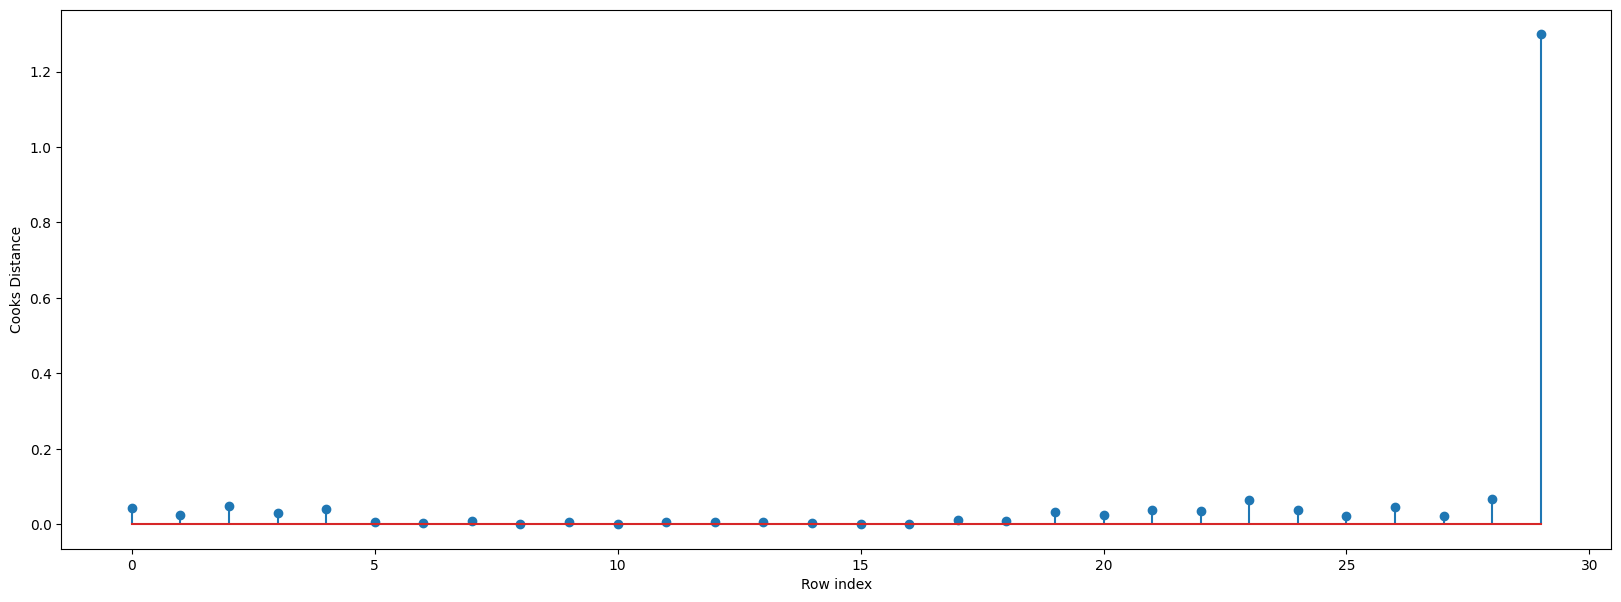

29 1.2994449638645083
   index  YearsExperience   Salary
0      0              1.1  39343.0
1      1              1.3  46205.0
2      2              1.5  37731.0
3      3              2.0  43525.0
4      4              2.2  39891.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     23.83
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           4.19e-05
Time:                        16:43:47   Log-Likelihood:                -326.80
No. Observations:                  29   AIC:                             657.6
Df Residuals:                      27   BIC:                             660.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.649e+04   3993.829     16.648      0.000    5.83e+04    7.47e+04
np.exp(exp)     2.8004      0.574      4.881      0.000       1.623       3.978
==============================================================================
Omnibus:                        3.103   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.561
Skew:                           0.227   Prob(JB):                        0.458
Kurtosis:                       1.958   Cond. No.                     7.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [298]:
print('model_exp:')
model_exp = smf.ols('salary~np.exp(exp)',data=df).fit()
print(model_exp.summary())
plt.show()

influence_plot(model_exp)
plt.title('model_exp')
plt.show()

# Cooks distance to detect outlier
from statsmodels.graphics.regressionplots import influence_plot
model_exp_influence = model_exp.get_influence()
(c, _) = model_exp_influence.cooks_distance

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

print(np.argmax(c),np.max(c))

df_exp=pd.read_csv('Salary_Data.csv')
df_exp=df_exp.drop(df_exp.index[[29]],axis=0).reset_index()
print(df_exp.head())

df_exp = df_exp.rename(columns={"Salary":"salary","YearsExperience":"exp"})
model_exp=smf.ols('salary~np.exp(exp)',data=df_exp).fit()
model_exp.summary()

model_sqrt:
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           8.57e-18
Time:                        16:43:47   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.606e+04   4921.599  

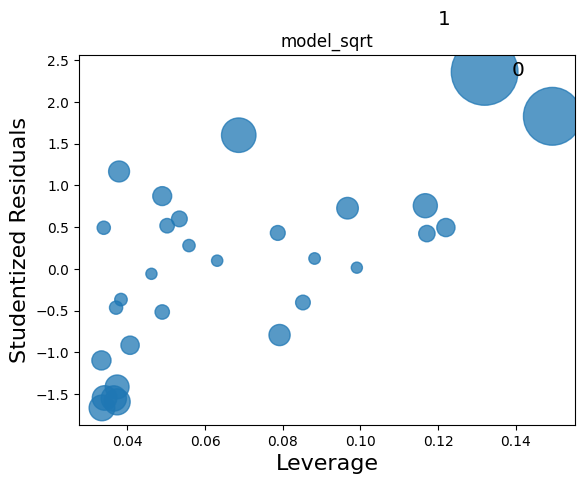

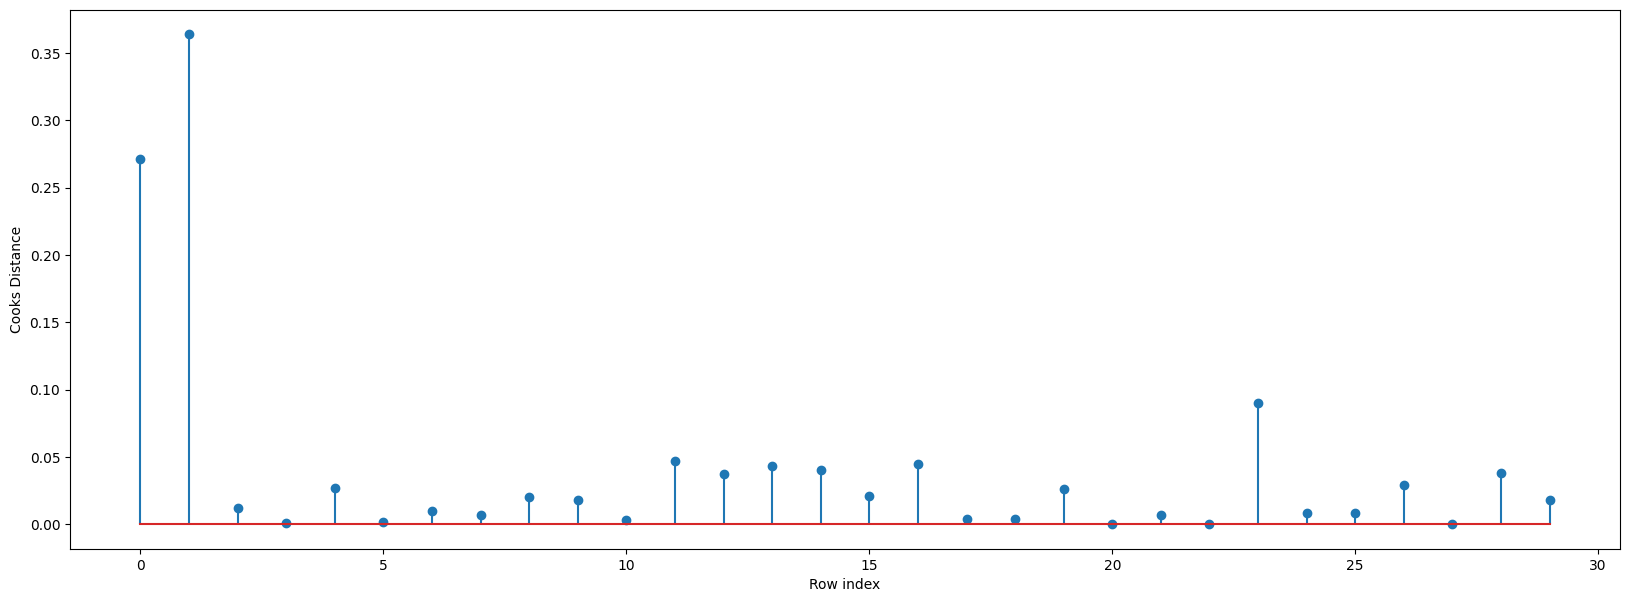

1 0.36412667401011317
   index  YearsExperience   Salary
0      0              1.1  39343.0
1      1              1.3  46205.0
2      2              1.5  37731.0
3      3              2.0  43525.0
4      4              2.2  39891.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     328.4
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.22e-16
Time:                        16:43:48   Log-Likelihood:                -298.60
No. Observations:                  29   AIC:                             601.2
Df Residuals:                      27   BIC:                             603.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.543e+04   5146.301     -2.998      0.006    -2.6e+04   -4871.160
np.sqrt(exp)  4.116e+04   2271.155     18.123      0.000    3.65e+04    4.58e+04
==============================================================================
Omnibus:                        0.941   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.788
Skew:                           0.026   Prob(JB):                        0.674
Kurtosis:                       2.194   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
print('model_sqrt:')
model_sqrt = smf.ols('salary~np.sqrt(exp)',data=df).fit()
print(model_sqrt.summary())
print('\n')

influence_plot(model_sqrt)
plt.title('model_sqrt')
plt.show()

# Cooks distance to detect outlier
from statsmodels.graphics.regressionplots import influence_plot
model_sqrt_influence = model_sqrt.get_influence()
(c, _) = model_sqrt_influence.cooks_distance

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

print(np.argmax(c),np.max(c))

df_sqrt=pd.read_csv('Salary_Data.csv')
df_sqrt=df_sqrt.drop(df_sqrt.index[[29]],axis=0).reset_index()
print(df_sqrt.head())

df_sqrt = df_sqrt.rename(columns={"Salary":"salary","YearsExperience":"exp"})
model_sqrt=smf.ols('salary~np.sqrt(exp)',data=df_sqrt).fit()
model_sqrt.summary()



model_reciprocal:
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           7.58e-07
Time:                        16:43:48   Log-Likelihood:                -335.30
No. Observations:                  30   AIC:                             674.6
Df Residuals:                      28   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

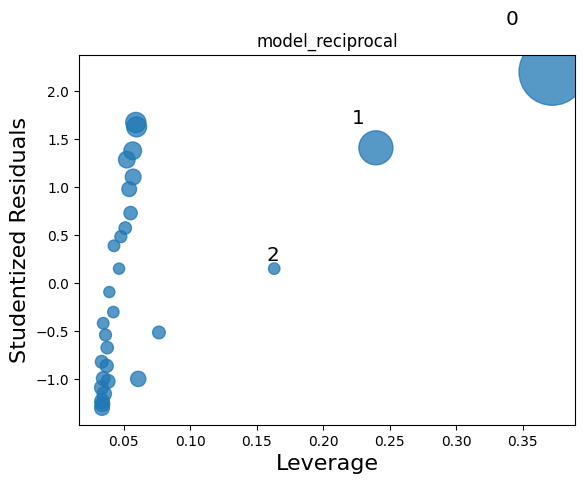

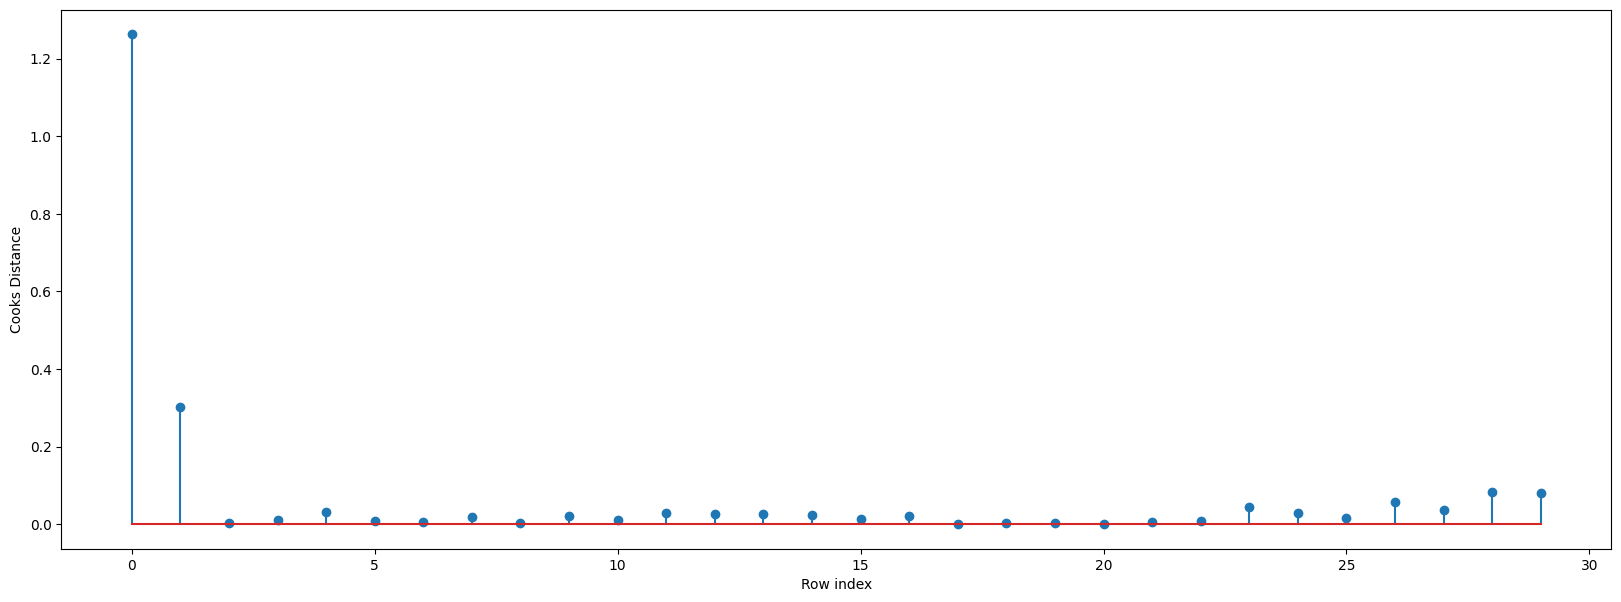

0 1.263089992856929
   index  YearsExperience   Salary
0      1              1.3  46205.0
1      2              1.5  37731.0
2      3              2.0  43525.0
3      4              2.2  39891.0
4      5              2.9  56642.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     45.47
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           3.06e-07
Time:                        16:43:48   Log-Likelihood:                -322.22
No. Observations:                  29   AIC:                             648.4
Df Residuals:                      27   BIC:                             651.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.095e+05   5705.015     19.192      0.000    9.78e+04    1.21e+05
np.reciprocal(exp) -1.284e+05    1.9e+04     -6.743      0.000   -1.68e+05   -8.94e+04
==============================================================================
Omnibus:                        3.095   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                1.861
Skew:                           0.378   Prob(JB):                        0.394
Kurtosis:                       2.016   Cond. No.                         6.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
print('\n')
print('model_reciprocal:')
model_reciprocal = smf.ols('salary~np.reciprocal(exp)',data=df).fit()
print(model_reciprocal.summary())
print('\n')


influence_plot(model_reciprocal)
plt.title('model_reciprocal')
plt.show()

# Cooks distance to detect outlier
from statsmodels.graphics.regressionplots import influence_plot
model_reciprocal_influence = model_reciprocal.get_influence()
(c, _) = model_reciprocal_influence.cooks_distance

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

print(np.argmax(c),np.max(c))

df_reciprocal=pd.read_csv('Salary_Data.csv')
df_reciprocal=df_reciprocal.drop(df_reciprocal.index[[0]],axis=0).reset_index()
print(df_reciprocal.head())

df_reciprocal = df_reciprocal.rename(columns={"Salary":"salary","YearsExperience":"exp"})
model_reciprocal=smf.ols('salary~np.reciprocal(exp)',data=df_reciprocal).fit()
model_reciprocal.summary()